# PRACTICA 2


## Problema 1

Consider an exam with 10 questions with 5 possible answers for each question, to which one has to randomly answer.

Consider the random variable X = number of questions one guesses in the exam.

In [30]:
# The problem can be represented by a binomial distribution
# with the following parameters

# Number of repetitions of the binary experiment
questions  <- 10

# Success probability
probability <- 0.2

In [31]:
# Let's calculate the expected value
# For a binomial distribution: 
# exp = n_repetitions * success_probability

expected <- questions * probability
print(paste("The expected value is:", expected))

# Now calculate the standard deviation
# For a binomial distribution: 
# var = (n_repetitions * success_probability)(1 - success_probability) =
# = exp * (1 - success_probability)
# std.dev = sqrt(var)

std.dev <- sqrt(expected*(1 - probability))

print(paste("The standard deviation is:", format(round(sqrt(std.dev), 2), nsmall = 2)))

[1] "The expected value is: 2"
[1] "The standard deviation is: 1,12"


In [32]:
# Calculate the probability of guessing 0,1,2,..,10 questions

# To do it, we need to evaluate the probability density function (p.d.f.)
# so dbinom ('d' as density) is the R command we need
prob.vec <- dbinom(0:10,questions,probability)

print("The probability to guess:")
for (i in 0:10){
    if (i == 1)
        print(paste(i,"question:",format(round(prob.vec[i+1], 8), nsmall = 8)))
    else
        print(paste(i,"questions:",format(round(prob.vec[i+1], 8), nsmall = 8)))
}

print(paste("Luckily, the sum of all the probabilities is:", sum(prob.vec)))

[1] "The probability to guess:"
[1] "0 questions: 0,10737418"
[1] "1 question: 0,26843546"
[1] "2 questions: 0,30198989"
[1] "3 questions: 0,20132659"
[1] "4 questions: 0,08808038"
[1] "5 questions: 0,02642412"
[1] "6 questions: 0,00550502"
[1] "7 questions: 0,00078643"
[1] "8 questions: 7,373e-05"
[1] "9 questions: 4,1e-06"
[1] "10 questions: 1e-07"
[1] "Luckily, the sum of all the probabilities is: 1"


In [33]:
# Calculate the probability of guessing at least i questions

# In this case, we have to evaluate the cumulative probability function, and 
# pbinom is the R command we need
prob.cumulative <- pbinom(0:10, questions, probability)

print("The probability to guess at least:")
for (i in 0:10){
    if (i == 1)
        print(paste(i,"question:",format(round(prob.cumulative[i+1], 8), nsmall = 8)))
    else
        print(paste(i,"questions:",format(round(prob.cumulative[i+1], 8), nsmall = 8)))
}

[1] "The probability to guess at least:"
[1] "0 questions: 0,10737418"
[1] "1 question: 0,37580964"
[1] "2 questions: 0,67779953"
[1] "3 questions: 0,87912612"
[1] "4 questions: 0,96720650"
[1] "5 questions: 0,99363062"
[1] "6 questions: 0,99913564"
[1] "7 questions: 0,99992207"
[1] "8 questions: 0,99999580"
[1] "9 questions: 0,99999990"
[1] "10 questions: 1,00000000"


In [35]:
# Create a pdf file 
pdf("Guess_probabilities.pdf")

# Create a 2-panel graphics
par(mfrow=c(2,1)) 

# Now, let's plot the probabilities...

barplot(prob.vec, names.arg = c(0:10), xlab = "Correct answers", ylab = "Probability",
       main = "Probability to guess n correct answers")

# ... and the cumulative probabilities
# (probability to guess at least n answers)

barplot(prob.cumulative, names.arg = c(0:10), xlab = "Minimum number of correct answers", ylab = "Probability",
       main = "Probability to guess at least n correct answers")

# Close the pdf file to save the plots
dev.off()

png 
  2

The most probable number of correct answers is 2, which corresponds to the expected value.

The interpretation is that is not a good idea to answer to this kind of exam randomly.

## Problema 2

Consider the GOT.csv file containing the number of deaths during each of the first 67 episodes of Game of Thrones.


In [40]:
# Load the necessary library and the file

# Useful to manage and plot data.frames
library("tidyverse")

# Load the file
got <- read_csv("GOT.csv")
str(got)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  Season = col_double(),
  Episode = col_double(),
  NumDeaths = col_double()
)


Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	67 obs. of  4 variables:
 $ X1       : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Season   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Episode  : num  1 2 3 4 5 6 7 8 9 10 ...
 $ NumDeaths: num  4 3 0 1 5 4 2 7 2 3 ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_double(),
  ..   Season = col_double(),
  ..   Episode = col_double(),
  ..   NumDeaths = col_double()
  .. )


The number of deaths in an episode can be considered as a random variable describing the probability of an event to happen in a specific time interval.

If we assume that the distribution of the variable is not affected by the time elapsed since the last event, then we can describe it through a Poisson distribution.

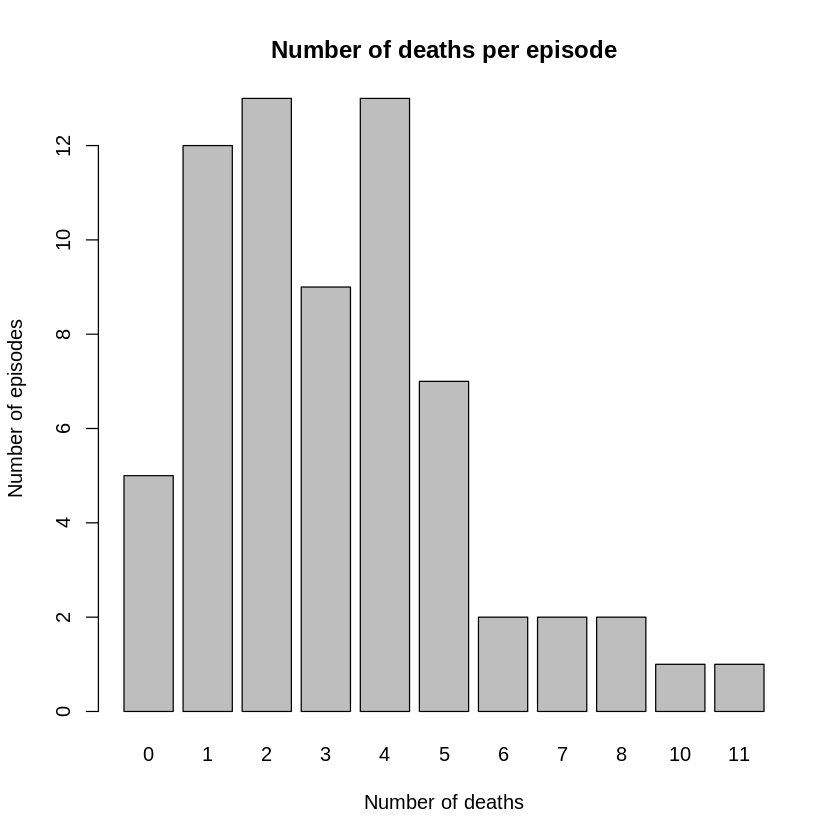

In [41]:
# Let's see how the number of deaths per episode is distributed
death.table <- table(got$NumDeaths)

barplot(death.table, xlab="Number of deaths", ylab="Number of episodes",
       main = "Number of deaths per episode")

In [42]:
# The distribution, as we guessed, is very similar to a Poisson
# Let's extract the key value of the distribution

# lambda = mean value of the distribution
# sqrt(lambda) = standard deviation of the distribution
lambda <- mean(got$NumDeaths)
print(paste("The expected value of deaths in an episode is", format(round(lambda, 2), nsmall = 2)))
print(paste("The standard deviation is", format(round(sqrt(lambda), 2), nsmall = 2)))

[1] "The expected value of deaths in an episode is 3,21"
[1] "The standard deviation is 1,79"


To calculate the probaility to have more than 4 deaths, we do:
(1 - probability to have 4 or less deaths).

In [43]:
# The probability to have more than 4 deaths in an episode can be
# calculated using the 'ppois' function.
# Since 'ppois' returns the probability to have 4 or less deaths,
# we have to consider (1 - ppois(4, lambda))

p.4 <- (1 - ppois(4, lambda))
print(paste("The probability to have more than 4 deaths in an episode is", 
            format(round(p.4*100, 2), nsmall = 2),"%"))

[1] "The probability to have more than 4 deaths in an episode is 22,10 %"


As said, the Poisson distribution describes processes in which the events happen independently on the time elapsed since the former event happened.
This may not be the case in a TV fiction, in which interesting events (as the death of important characters) may cluster at the end of a season, to _hang_ the public until the beginning of the next season.
Let's try to qualitatively test this hypotesis.

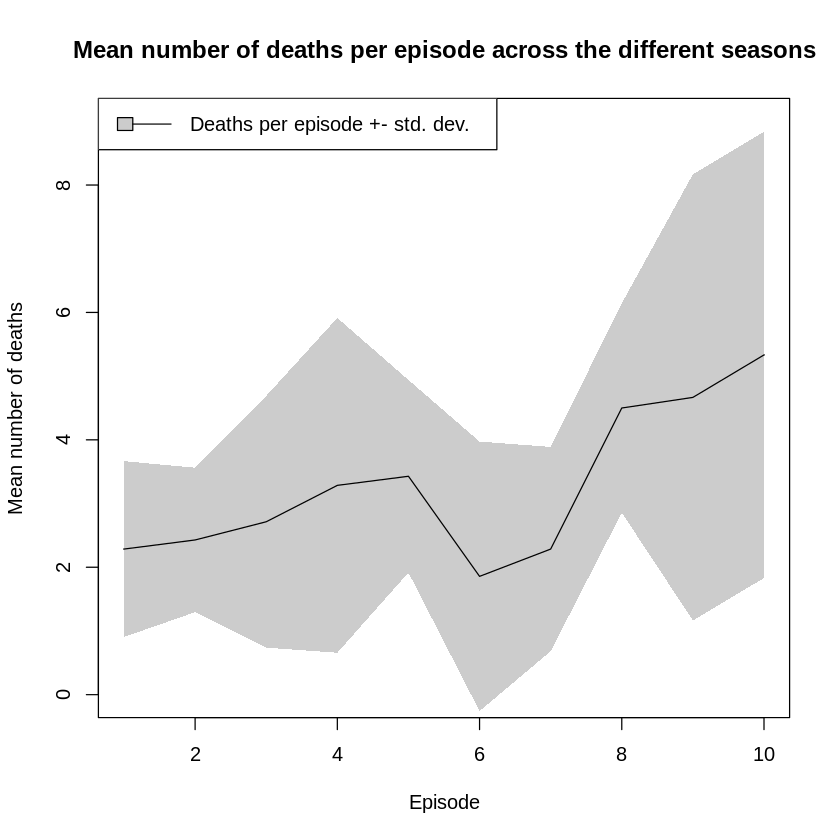

In [45]:
# Let's plot the distribution of the mean number of deaths per episode
# versus the number of episode in the season
death.episode.mean    <- c(tapply(X = got$NumDeaths, INDEX = got$Episode, mean))
death.episode.std.dev <- c(tapply(X = got$NumDeaths, INDEX = got$Episode, sd))

death.episode.std.dev.up   <- death.episode.mean + death.episode.std.dev
death.episode.std.dev.down <- death.episode.mean - death.episode.std.dev

plot(c(1:10), death.episode.mean, ylim = c(0,9), type = "l",
    xlab = "Episode", ylab = "Mean number of deaths",
    main = "Mean number of deaths per episode across the different seasons")

polygon(c(c(1:10), c(10:1)), c(death.episode.std.dev.up, rev(death.episode.std.dev.down)), col = "grey80", border = NA)
lines(c(1:10), death.episode.mean, ylim = c(0,9))

legend("topleft",lty=1, 
       "Deaths per episode +- std. dev.", 
       col = "black",
       fill = "grey80")

It is evident in the previous bar plot that the last episodes of a season count more deaths than the first ones.

In particular, this fact makes the distribution not flat (as it should in a real Poisson). 

As it can be seen, there is a trend that makes the number of deaths to increase when approaching the end of a season. In any case, the large error bars seem allow the assumption that the distribution is not incompatible with a flat probability. 

In other words, our approximation (a Poisson distribution can describe our variable) is a good starting point to try and estimate the probability for a certain number of deaths to happen in an episode.

In [12]:
# To estimate the probability to have exactly n deaths
# in an espisode, we have to evaluate the probability density function,
# by using 'dpois'
death.prob <- dpois(0:10, lambda)

print("The probability to have:")
for (i in 0:10){
    if (i == 1)
        print(paste(i,"death:",format(round(death.prob[i+1], 8), nsmall = 8)))
    else
    print(paste(i,"deaths:",format(round(death.prob[i+1], 8), nsmall = 8)))
}

print(paste("In this case, the sum of these probabilities is:",format(round(sum(death.prob), 8), nsmall = 8)))
print(paste("This means that the probability to have more than 10 deaths in an episode is", 
            format(round(1 - sum(death.prob), 8), nsmall = 8)))

[1] "The probability to have:"
[1] "0 deaths: 0,04039880"
[1] "1 death: 0,12963794"
[1] "2 deaths: 0,20800117"
[1] "3 deaths: 0,22248881"
[1] "4 deaths: 0,17848916"
[1] "5 deaths: 0,11455274"
[1] "6 deaths: 0,06126577"
[1] "7 deaths: 0,02808559"
[1] "8 deaths: 0,01126567"
[1] "9 deaths: 0,00401678"
[1] "10 deaths: 0,00128897"
[1] "In this, the sum of these probabilities is: 0,99949140"
[1] "This means that the probability to have more than 10 deaths in an episode is 0,00050860"


In this case, the sum of the probabilities to observe a number of deaths between 0 and 10 is not 1.
In fact, nothing says that there is a maximum number of deaths per episode: the tail of the Poisson distribution can reach very high values, even if with an almost zero probability.

## Problema 3

Cholesterol level has been measured in a sample of people to have a mean of 180 mg/dL and a standard deviation of 25 mg/dL.

In [47]:
# The distribution describing this measurement is a gaussian (normal)
# with the following parameters:

# Mean of the distribution and expected value
mean <- 180

# Standard deviation
std.dev <- 25

In [48]:
# To get the probability of a person to have more than 225 mg/dL
# we have to calculate the cumulative until 225 mg/dL and 
# take (1 - cumulative(225 mg/dL))

prob.more.225 <- 1 - pnorm(225,180,25)
print(paste("The probability for a person to have more than 225 mg/dL of cholesterol is:",
            format(round(prob.more.225, 4), nsmall = 4)))

[1] "The probability for a person to have more than 225 mg/dL of cholesterol is: 0,0359"


In [49]:
# To get the value of cholesterol that encloses the 95%
# of the population, we have to use the 'qnorm' ('q' as quantile) 
# function

p <- 0.95

perc.95 <- qnorm(p,mean,std.dev)
print(paste("95% of the population has a value of cholesterol of:",
            format(round(perc.95, 0), nsmall = 0),"or less"))

[1] "95% of the population has a value of cholesterol of: 221 or less"


In [51]:
# Considering that the mean value of cholesterol is 180 mg/dL
# and that it cannot assume negative values, it makes sense to 
# plot the probability density function (p.d.f.) and the 
# distribution function between 0 and 360.

# Define x coordinate
x <- seq(0, 360, length=3600)

# Produce a vector with the p.d.f. evaluated
# in each point of x
pdf <- dnorm(x,mean,std.dev)

# Produce a vector with the distribution function evaluated
# in each point of x
dist.func <- pnorm(x,mean,std.dev)

In [52]:
# Now plot the distributions and save them into a pdf file

# Save everything that follows in
# "Gaussian_distribution.pdf"
pdf("Gaussian_distribution.pdf")

par(mfrow=c(2,1)) 

# p.d.f. plot
plot(x, pdf, type="l", lty=1, 
     xlab="Cholesterol level [mg/dL]", ylab="Probability density", 
     main="Probability density function of cholesterol level")

# Distribution function plot
plot(x, dist.func, type="l", lty=1, 
     xlab="Cholesterol level [mg/dL]", ylab="Distribution function", 
     main="Distribution function of cholesterol level")

# Stop saving things in "Gaussian_distribution.pdf"
dev.off()

png 
  2

## Problema 4

In the 'results.csv' file, the results of 40838 international football matches are stored.
In the 'home_score' column, the goal scored by local team in each match are listed.
In the 'home_team' column, the local team in each match is shown.

In [4]:
# Load the necessary library and the file

# Useful to manage and plot data.frames
library("tidyverse")

# Load the file
results <- read_csv("results.csv")
str(results)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  date = col_date(format = ""),
  home_team = col_character(),
  away_team = col_character(),
  home_score = col_double(),
  away_score = col_double(),
  tournament = col_character(),
  city = col_character(),
  country = col_character(),
  neutral = col_logical()
)


Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	40945 obs. of  9 variables:
 $ date      : Date, format: "1872-11-30" "1873-03-08" ...
 $ home_team : chr  "Scotland" "England" "Scotland" "England" ...
 $ away_team : chr  "England" "Scotland" "England" "Scotland" ...
 $ home_score: num  0 4 2 2 3 4 1 0 7 9 ...
 $ away_score: num  0 2 1 2 0 0 3 2 2 0 ...
 $ tournament: chr  "Friendly" "Friendly" "Friendly" "Friendly" ...
 $ city      : chr  "Glasgow" "London" "Glasgow" "London" ...
 $ country   : chr  "Scotland" "England" "Scotland" "England" ...
 $ neutral   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 - attr(*, "spec")=
  .. cols(
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character(),
  ..   city = col_character(),
  ..   country = col_character(),
  ..   neutral = col_logical()
  .. )


The number of goals scored in a football match is a variable describing an event that can happen in a specific time interval, so that we can expect its distribution to follow the Poisson function.

Let's try to verify it by inspecting the distribution of goals scored by Spain as local team.

In [5]:
# Select only the matches in which Spain plays at home
spain.local.goals <- filter(results, home_team == "Spain")
str(spain.local.goals)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	357 obs. of  9 variables:
 $ date      : Date, format: "1921-12-18" "1923-01-28" ...
 $ home_team : chr  "Spain" "Spain" "Spain" "Spain" ...
 $ away_team : chr  "Portugal" "France" "Portugal" "Austria" ...
 $ home_score: num  3 3 3 2 1 4 1 1 5 8 ...
 $ away_score: num  1 0 0 1 0 2 0 1 0 1 ...
 $ tournament: chr  "Friendly" "Friendly" "Friendly" "Friendly" ...
 $ city      : chr  "Madrid" "San Sebastián" "Seville" "Barcelona" ...
 $ country   : chr  "Spain" "Spain" "Spain" "Spain" ...
 $ neutral   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 - attr(*, "spec")=
  .. cols(
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character(),
  ..   city = col_character(),
  ..   country = col_character(),
  ..   neutral = col_logical()
  .. )


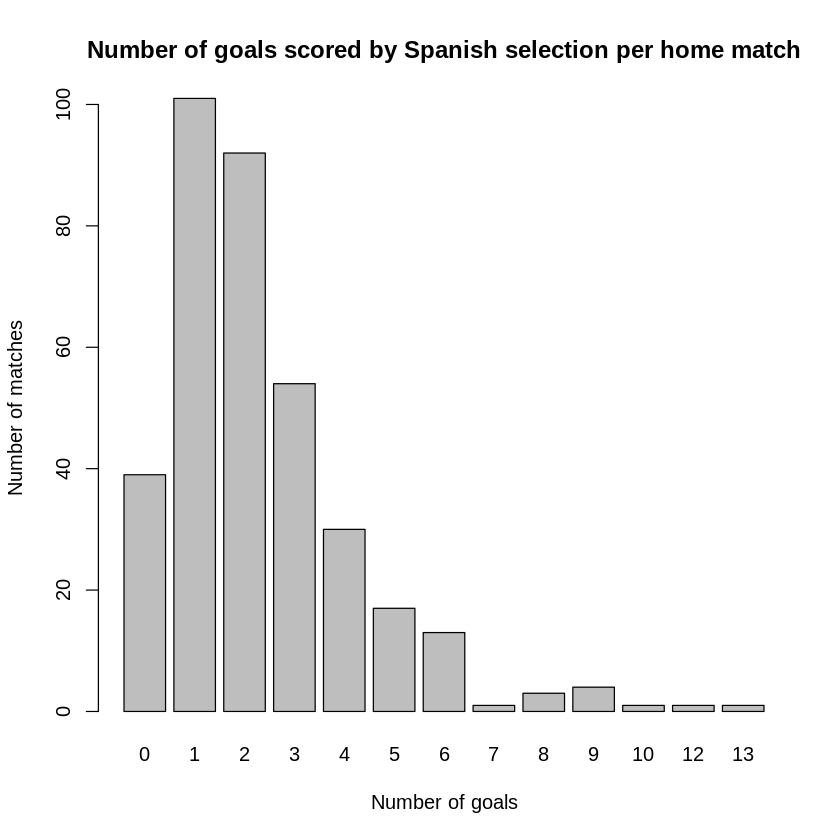

In [6]:
# Create a table of frequencies for the goals scored
goal.table <- table(spain.local.goals$home_score)

# Represent the distribution
barplot(goal.table, xlab = "Number of goals", ylab = "Number of matches",
       main = "Number of goals scored by Spanish selection per home match")

The plots really looks like the one produced by a Poisson distribution.

In [10]:
# Let's extract the key value 'lambda' of the distribution (its mean)

lambda <- mean(spain.local.goals$home_score)

# To estimate the probability to score more than 3 goals
# in the next match, we can calculate the probability
# of scoring 3 or less goals and take the complementary

prob.more.3 <- (1 - ppois(3,lambda))

print(paste("The probability to score more than 3 goals in the next match is", format(round(prob.more.3, 2), nsmall = 2)))

[1] "The probability to score more than 3 goals in the next match is 0,21"


Of course, this estimation relies on the fact that the probability to score a certain amount of goals in a match is the same in every match and does not take into account the fact the not all the teams are at the same level, so it is easier to score more goals against a weaker team than against a stronger team.

As in exercise 2, the probability to score exactly **n** goals is obtained by evaluating the probability density function by using the _dpois_ command.

In [16]:
prob.goal <- dpois(0:10, lambda)

print("The probability to score:")
for (i in 0:10){
    if (i == 1)
        print(paste(i,"goal:",format(round(prob.goal[i+1], 8), nsmall = 8)))
    else
    print(paste(i,"goals:",format(round(prob.goal[i+1], 8), nsmall = 8)))
}

print(paste("In this case, the sum of these probabilities is:",format(round(sum(prob.goal), 8), nsmall = 8)))
print(paste("This means that the probability to score more than 10 goals in a match is", 
            format(round(1 - sum(prob.goal), 8), nsmall = 8)))
print(paste("The most probable number of goals scored is 2"))

[1] "The probability to score:"
[1] "0 goals: 0,09724398"
[1] "1 goal: 0,22663023"
[1] "2 goals: 0,26408452"
[1] "3 goals: 0,20515249"
[1] "4 goals: 0,11952862"
[1] "5 goals: 0,05571306"
[1] "6 goals: 0,02164018"
[1] "7 goals: 0,00720473"
[1] "8 goals: 0,00209886"
[1] "9 goals: 0,00054350"
[1] "10 goals: 0,00012666"
[1] "In this case, the sum of these probabilities is: 0,99996683"
[1] "This means that the probability to score more than 10 goals in a match is 3,317e-05"
[1] "The most probable number of goals scored is 2"


A bookmaker pays 4 Euros for every Euro you bet (you gain 3 Euros) if Spain scores more than 3 goals in the next home match, otherwise you loose the Euro you bet. 

Is it a good idea to bet?

To decide this, we have to evaluate the expected amount of money we gain if we bet.

In [28]:
# Probability to win
p.win <- prob.more.3

# What we win
money.win <- 3


# Probability to lose
p.lose <- 1 - p.win

# What we loose
money.lose <- 1


# Expected amount of money gained
money <- (p.win * money.win) - (p.lose * money.lose)

# Result:

word <- 0
phrase <-0

if(money > 0){
    word <- "win"
    phrase <- "Let's bet!"    
} else{
    word <- "lose"
    phrase <- "I would not bet."
}
    
print(paste("The expectation is that for every euro we play, we",word,format(round(abs(money), 2), nsmall = 2),"euros"))
print(phrase)

[1] "The expectation is that for every euro we play, we lose 0,17 euros"
[1] "I would not bet."
